Question 01: 1.	Use Table 1 to create Decision Tree using C4.5 and CART. Use Depth = 2. Show all steps clearly.  

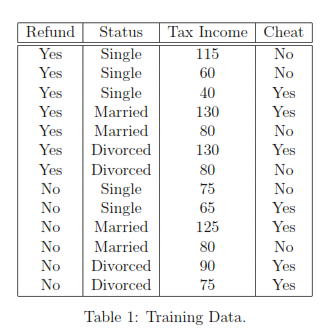

In [ ]:
# Importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creating a DataFrame
dataSet = {
    'Refund': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No'],
    'Status': ['Single', 'Single', 'Single', 'Married', 'Married', 'Divorced', 'Divorced', 'Single', 'Single', 'Married', 'Married', 'Divorced', 'Divorced'],
    'Tax Income': [115, 60, 40, 130, 80, 130, 80, 75, 65, 125, 80, 90, 75],
    'Cheat': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes']
}

In [ ]:
data = pd.DataFrame(dataSet)

In [ ]:
data

,Refund,Status,Tax Income,Cheat
0,Yes,Single,115,No
1,Yes,Single,60,No
2,Yes,Single,40,Yes
3,Yes,Married,130,Yes
4,Yes,Married,80,No
5,Yes,Divorced,130,Yes
6,Yes,Divorced,80,No
7,No,Single,75,No
8,No,Single,65,Yes
9,No,Married,125,Yes


In [ ]:
# Encoding categorical features
labels = {}
categorical_features = ['Refund', 'Status']

for feature in categorical_features:
    labels[feature] = LabelEncoder()
    data[feature] = labels[feature].fit_transform(data[feature])

In [ ]:
data

,Refund,Status,Tax Income,Cheat
0,1,2,115,No
1,1,2,60,No
2,1,2,40,Yes
3,1,1,130,Yes
4,1,1,80,No
5,1,0,130,Yes
6,1,0,80,No
7,0,2,75,No
8,0,2,65,Yes
9,0,1,125,Yes


## Decision Tree Using C4.5

In [ ]:
# Creating C5.5 decision tree classifier with a depth of 2
decisionTreeC45 = DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
# Fitting the model to the data
X = data.drop('Cheat', axis=1)
y = data['Cheat']
decisionTreeC45.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
# Generating textual representation of the decision tree
tree_rules_01 = export_text(decisionTreeC45, feature_names=list(X.columns))
print(tree_rules_01)

|--- Tax Income <= 120.00
|   |--- Tax Income <= 50.00
|   |   |--- class: Yes
|   |--- Tax Income >  50.00
|   |   |--- class: No
|--- Tax Income >  120.00
|   |--- class: Yes



## Decision Tree Using CART

In [ ]:
# Creating CART decision tree classifier with a depth of 2
decisionTreeCart = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [ ]:
# Fitting the model on the data
decisionTreeCart.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
# Generating textual representation of the decision tree
tree_rules_02 = export_text(decisionTreeCart, feature_names=list(X.columns))
print(tree_rules_02)

|--- Tax Income <= 120.00
|   |--- Tax Income <= 77.50
|   |   |--- class: Yes
|   |--- Tax Income >  77.50
|   |   |--- class: No
|--- Tax Income >  120.00
|   |--- class: Yes



## Prediction for New Data

In [ ]:
test_data = pd.DataFrame({
    'Refund': [0],
    'Status': [1],
    'Tax Income': [109]
})
test_data

,Refund,Status,Tax Income
0,0,1,109


In [ ]:
print('Predicting result for Test Data using C4.5: ' + '\n')
print(decisionTreeC45.predict(test_data))

Predicting result for Test Data using C4.5: 

['No']


In [ ]:
print('Predicting result for Test Data using CART: ' + '\n')
print(decisionTreeCart.predict(test_data))

Predicting result for Test Data using CART: 

['No']
